In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from google.colab import files

In [ ]:
uploarder = files.upload()

Saving heart_2022_with_nans.csv to heart_2022_with_nans.csv


In [25]:
df = pd.read_csv('heart_2022_with_nans.csv')

df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [3]:
def show_heat_map(df):
    plt.figure(figsize = (8, 12))
    sns.heatmap(df.isna().transpose(), cmap = 'Blues')
    plt.show()

    print(df.shape)

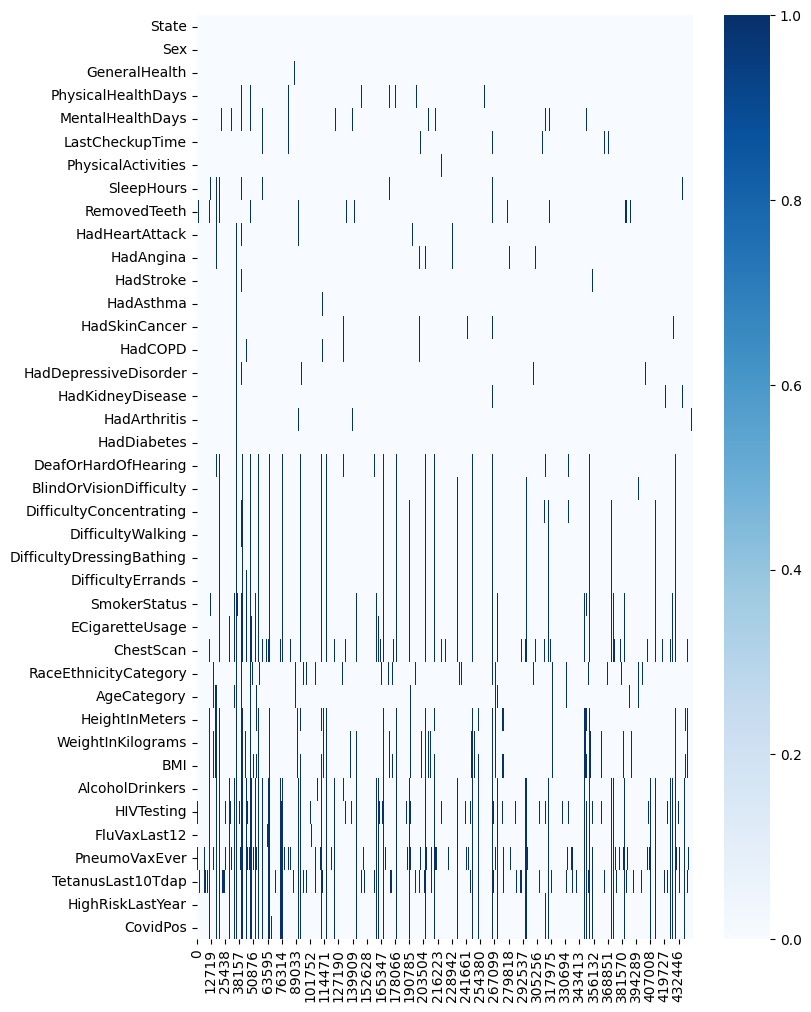

In [ ]:
show_heat_map(df)

In [26]:
df = df.dropna(thresh = 30, axis = 0)

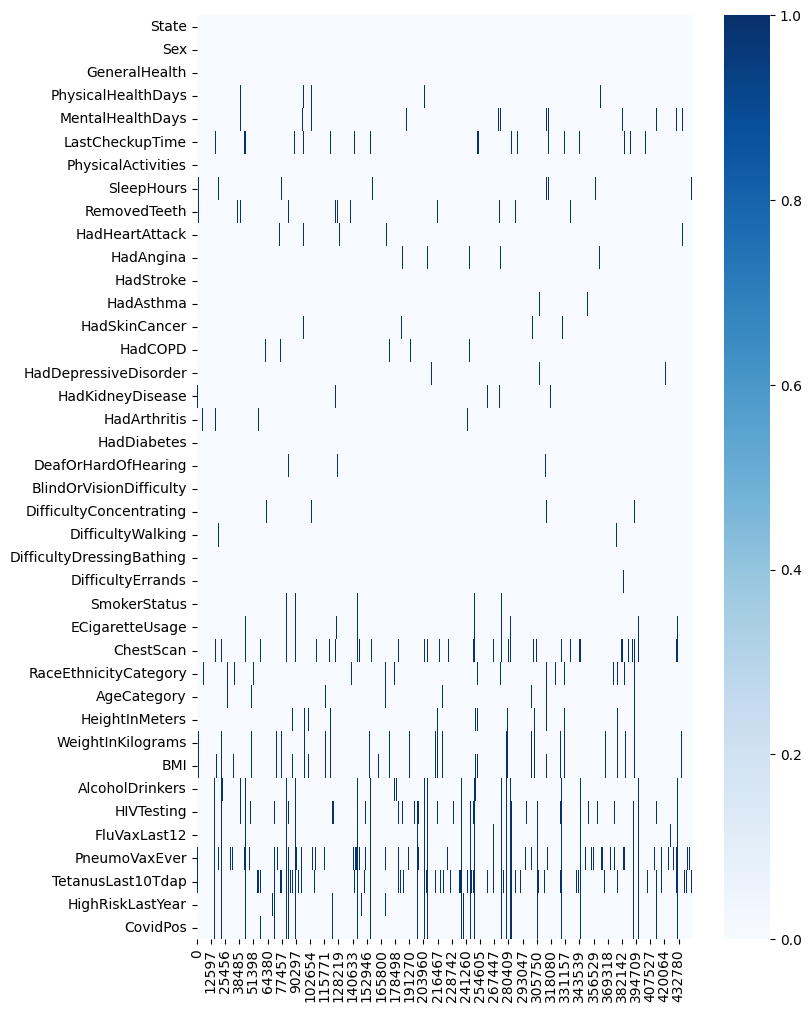

(416884, 40)


In [ ]:
show_heat_map(df)

In [ ]:
df.isna().sum() / df.shape[0] * 100

State                         0.000000
Sex                           0.000000
GeneralHealth                 0.238196
PhysicalHealthDays            2.293204
MentalHealthDays              1.902448
LastCheckupTime               1.733336
PhysicalActivities            0.201975
SleepHours                    1.115658
RemovedTeeth                  2.350534
HadHeartAttack                0.586014
HadAngina                     0.905768
HadStroke                     0.281133
HadAsthma                     0.331507
HadSkinCancer                 0.634469
HadCOPD                       0.416663
HadDepressiveDisorder         0.541877
HadKidneyDisease              0.357174
HadArthritis                  0.513092
HadDiabetes                   0.173669
DeafOrHardOfHearing           0.343261
BlindOrVisionDifficulty       0.292168
DifficultyConcentrating       0.638067
DifficultyWalking             0.328868
DifficultyDressingBathing     0.139367
DifficultyErrands             0.296485
SmokerStatus             

In [27]:
df = df.dropna(subset = ['HadHeartAttack'])

print(df.isna().sum() / df.shape[0] * 100)

df.info()

State                         0.000000
Sex                           0.000000
GeneralHealth                 0.231155
PhysicalHealthDays            2.256533
MentalHealthDays              1.877469
LastCheckupTime               1.715081
PhysicalActivities            0.198339
SleepHours                    1.090143
RemovedTeeth                  2.324094
HadHeartAttack                0.000000
HadAngina                     0.796495
HadStroke                     0.234533
HadAsthma                     0.313917
HadSkinCancer                 0.609254
HadCOPD                       0.392094
HadDepressiveDisorder         0.512980
HadKidneyDisease              0.344319
HadArthritis                  0.499227
HadDiabetes                   0.164076
DeafOrHardOfHearing           0.337081
BlindOrVisionDifficulty       0.285203
DifficultyConcentrating       0.626386
DifficultyWalking             0.322845
DifficultyDressingBathing     0.135604
DifficultyErrands             0.291718
SmokerStatus             

In [ ]:
df.duplicated().sum()

11

In [28]:
df = df.drop_duplicates()

df.shape

(414430, 40)

In [80]:
for i in df.columns:
    print(f"{i} :\n{df[i].value_counts()}")
    print("------------------------------\n")

State :
Washington              24408
New York                15950
Minnesota               15738
Ohio                    15266
Maryland                14936
Texas                   12893
Florida                 12126
Kansas                  10663
Massachusetts           10497
Wisconsin               10494
Maine                   10369
California               9914
Virginia                 9727
Arizona                  9435
Indiana                  9329
Michigan                 9207
Utah                     9182
South Carolina           9076
Colorado                 8726
Connecticut              8705
Iowa                     8528
Georgia                  8341
Vermont                  8115
Hawaii                   7375
South Dakota             7289
Missouri                 7162
New Jersey               7161
Nebraska                 7140
Montana                  6811
New Hampshire            6189
Idaho                    6124
Oregon                   5605
Alaska                   5468
Pu

In [29]:
to_drop = ['GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'HadAngina', 'HadStroke', 'HadAsthma',
           'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes',
           'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'SmokerStatus', 'ChestScan', 'AlcoholDrinkers',
           'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'HadHeartAttack']
to_fill = ['State', 'Sex','RemovedTeeth', 'DifficultyDressingBathing', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyErrands', 'ECigaretteUsage',
           'RaceEthnicityCategory', 'AgeCategory', 'HighRiskLastYear', 'CovidPos', 'TetanusLast10Tdap']

float_fill = ['BMI', 'WeightInKilograms', 'HeightInMeters', 'SleepHours', 'MentalHealthDays', 'PhysicalHealthDays']

label_encoder = LabelEncoder()
for i in to_drop:
    df = df.dropna(subset = [i])
    df[i] = label_encoder.fit_transform(df[i])

df.info()

<ipython-input-29-f9cf4d2656a2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = label_encoder.fit_transform(df[i])
<ipython-input-29-f9cf4d2656a2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = label_encoder.fit_transform(df[i])
<ipython-input-29-f9cf4d2656a2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311259 entries, 0 to 445130
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      311259 non-null  object 
 1   Sex                        311259 non-null  object 
 2   GeneralHealth              311259 non-null  int64  
 3   PhysicalHealthDays         305623 non-null  float64
 4   MentalHealthDays           306793 non-null  float64
 5   LastCheckupTime            311259 non-null  int64  
 6   PhysicalActivities         311259 non-null  int64  
 7   SleepHours                 308845 non-null  float64
 8   RemovedTeeth               305171 non-null  object 
 9   HadHeartAttack             311259 non-null  int64  
 10  HadAngina                  311259 non-null  int64  
 11  HadStroke                  311259 non-null  int64  
 12  HadAsthma                  311259 non-null  int64  
 13  HadSkinCancer              31

In [30]:
for i in to_fill:
    df[i] = df[i].fillna(df[i].mode())
    df[i] = label_encoder.fit_transform(df[i])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311259 entries, 0 to 445130
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      311259 non-null  int64  
 1   Sex                        311259 non-null  int64  
 2   GeneralHealth              311259 non-null  int64  
 3   PhysicalHealthDays         305623 non-null  float64
 4   MentalHealthDays           306793 non-null  float64
 5   LastCheckupTime            311259 non-null  int64  
 6   PhysicalActivities         311259 non-null  int64  
 7   SleepHours                 308845 non-null  float64
 8   RemovedTeeth               311259 non-null  int64  
 9   HadHeartAttack             311259 non-null  int64  
 10  HadAngina                  311259 non-null  int64  
 11  HadStroke                  311259 non-null  int64  
 12  HadAsthma                  311259 non-null  int64  
 13  HadSkinCancer              31

In [31]:
for i in float_fill:
    df[i] = df[i].fillna(df[i].median())

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311259 entries, 0 to 445130
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      311259 non-null  int64  
 1   Sex                        311259 non-null  int64  
 2   GeneralHealth              311259 non-null  int64  
 3   PhysicalHealthDays         311259 non-null  float64
 4   MentalHealthDays           311259 non-null  float64
 5   LastCheckupTime            311259 non-null  int64  
 6   PhysicalActivities         311259 non-null  int64  
 7   SleepHours                 311259 non-null  float64
 8   RemovedTeeth               311259 non-null  int64  
 9   HadHeartAttack             311259 non-null  int64  
 10  HadAngina                  311259 non-null  int64  
 11  HadStroke                  311259 non-null  int64  
 12  HadAsthma                  311259 non-null  int64  
 13  HadSkinCancer              31

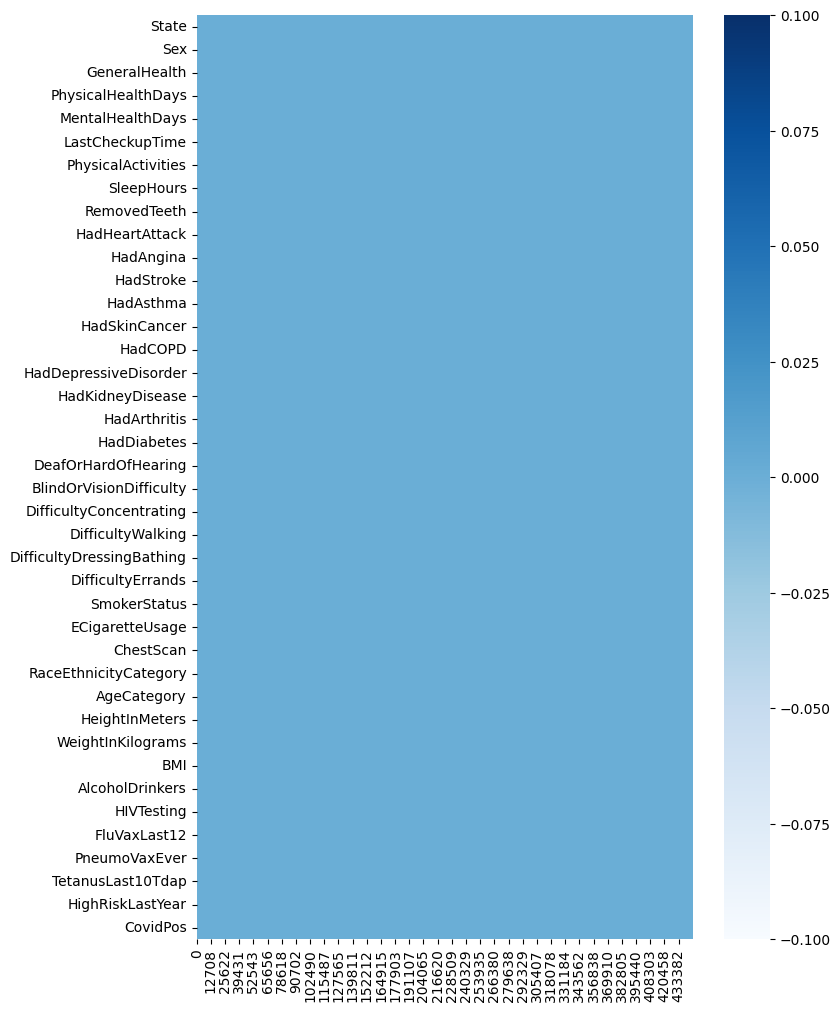

(311259, 40)


In [114]:
show_heat_map(df)

<Axes: >

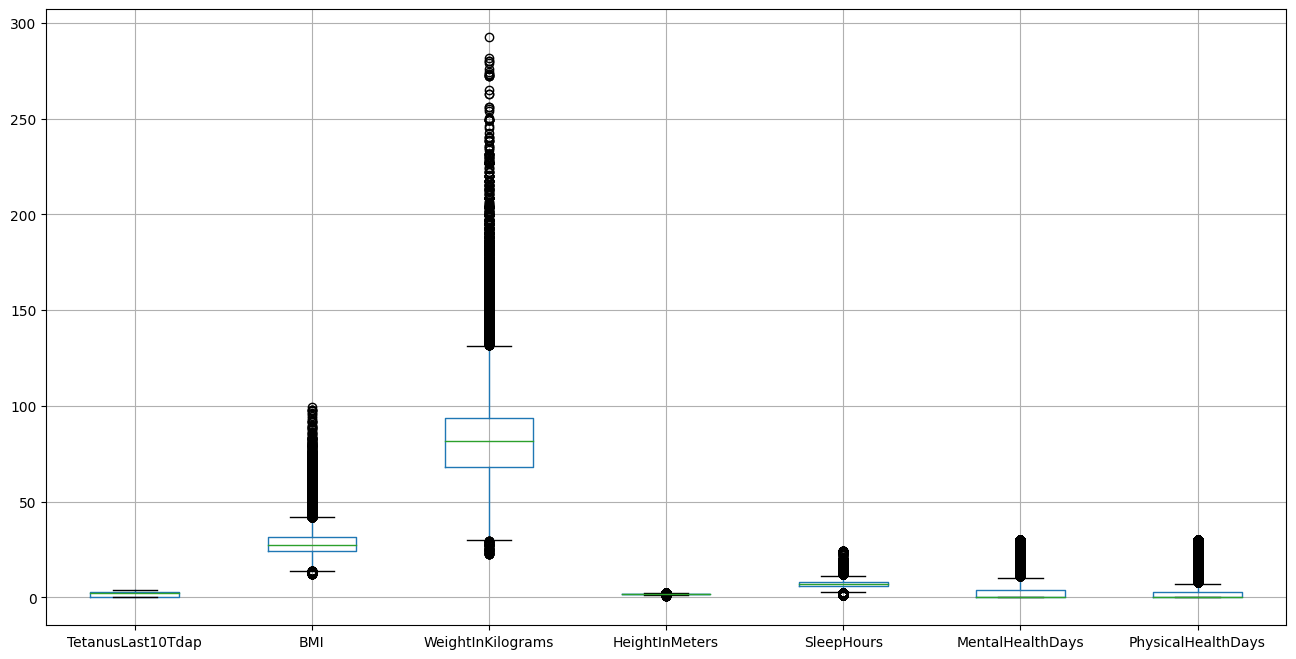

In [121]:
df[float_fill].boxplot(figsize = (16, 8))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9cac3b6860>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9cac3b5660>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9cac3b5bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9cac3b5630>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9cac3b7c70>],
 'means': []}

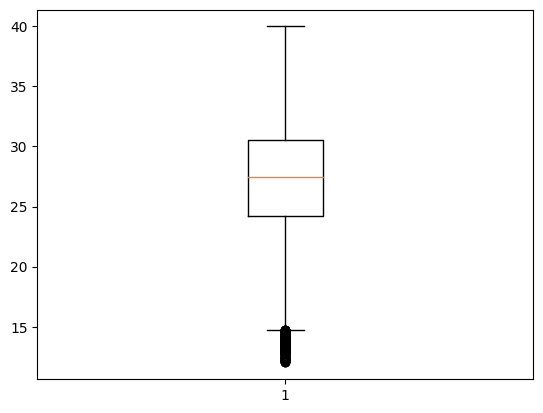

In [142]:
plt.boxplot(df['BMI'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7bd63493a500>,
 'caps': [<matplotlib.lines.Line2D at 0x7bd634955480>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bd634954670>],
 'medians': [<matplotlib.lines.Line2D at 0x7bd636a93f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bd636aea620>],
 'means': []}

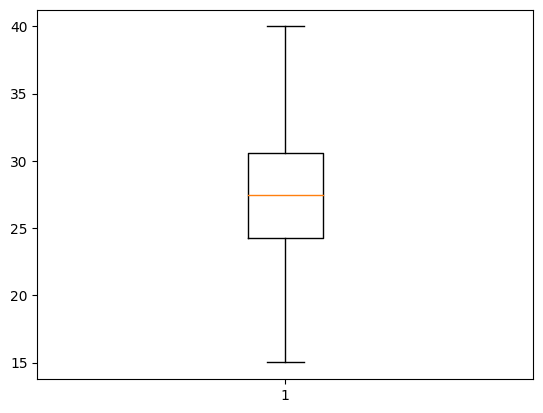

In [32]:
df = df[(df['BMI'] > 15) & (df['BMI'] < 40)]
plt.boxplot(df['BMI'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9cac206f80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9cac206770>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9cac207790>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9cac204520>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9cac207550>],
 'means': []}

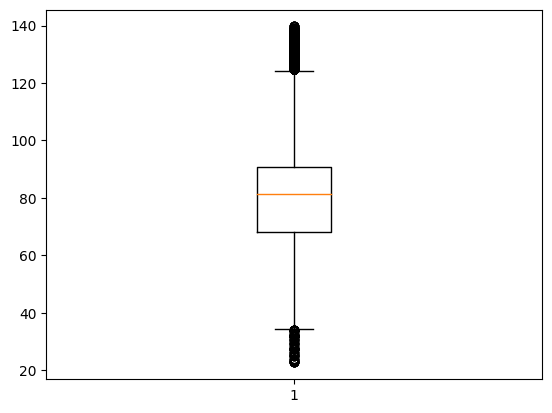

In [144]:
plt.boxplot(df['WeightInKilograms'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7bd62fb5bdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7bd62f9ac340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bd62fb5bb20>],
 'medians': [<matplotlib.lines.Line2D at 0x7bd62f9ac880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bd62f9acb20>],
 'means': []}

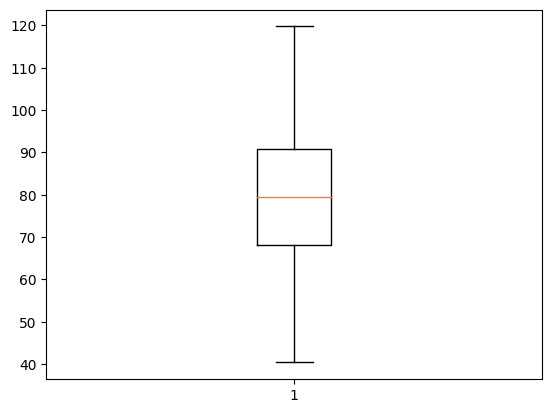

In [33]:
df = df[(df['WeightInKilograms'] < 120) & (df['WeightInKilograms'] > 40)]
plt.boxplot(df['WeightInKilograms'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9cac23d9c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9cac23e380>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9cac23c910>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9cac23e890>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9cac23c250>],
 'means': []}

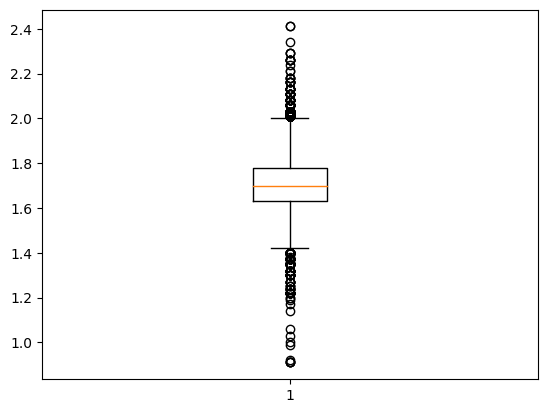

In [147]:
plt.boxplot(df['HeightInMeters'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7bd62fa18ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7bd62fa190c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bd62fa18a00>],
 'medians': [<matplotlib.lines.Line2D at 0x7bd62fa19600>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bd62fa198a0>],
 'means': []}

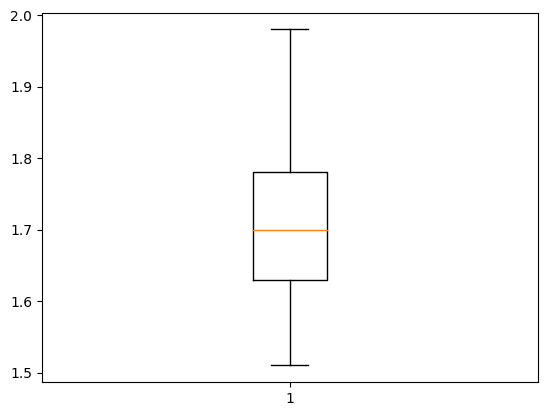

In [34]:
df = df[(df['HeightInMeters'] < 2.0) & (df['HeightInMeters'] > 1.5)]
plt.boxplot(df['HeightInMeters'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9c96a80040>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9c96a81c60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9c96a80670>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9c96a814e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9c96a82e90>],
 'means': []}

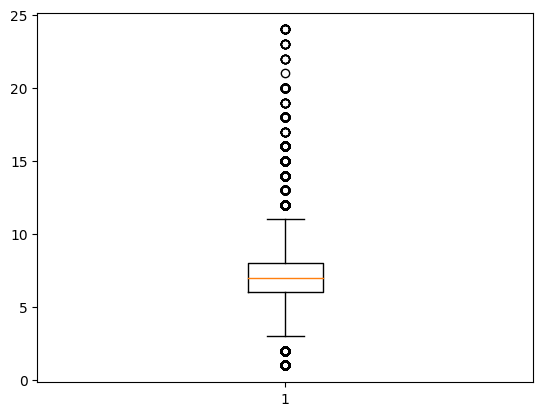

In [203]:
plt.boxplot(df['SleepHours'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7bd62fa633d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7bd62fa63910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bd62fa63130>],
 'medians': [<matplotlib.lines.Line2D at 0x7bd62fa63e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bd62f8a0130>],
 'means': []}

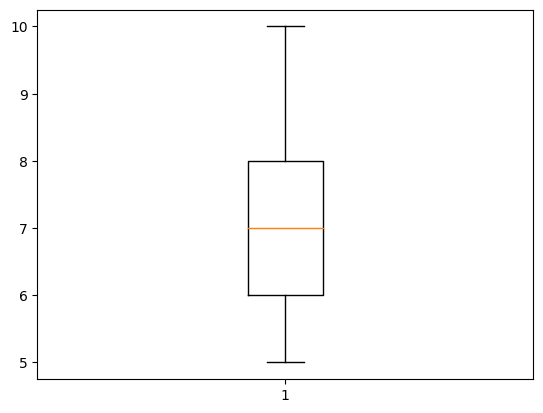

In [35]:
df = df[(df['SleepHours'] < 11.0) & (df['SleepHours'] > 4.0)]
plt.boxplot(df['SleepHours'])

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268201 entries, 0 to 445130
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      268201 non-null  int64  
 1   Sex                        268201 non-null  int64  
 2   GeneralHealth              268201 non-null  int64  
 3   PhysicalHealthDays         268201 non-null  float64
 4   MentalHealthDays           268201 non-null  float64
 5   LastCheckupTime            268201 non-null  int64  
 6   PhysicalActivities         268201 non-null  int64  
 7   SleepHours                 268201 non-null  float64
 8   RemovedTeeth               268201 non-null  int64  
 9   HadHeartAttack             268201 non-null  int64  
 10  HadAngina                  268201 non-null  int64  
 11  HadStroke                  268201 non-null  int64  
 12  HadAsthma                  268201 non-null  int64  
 13  HadSkinCancer              26

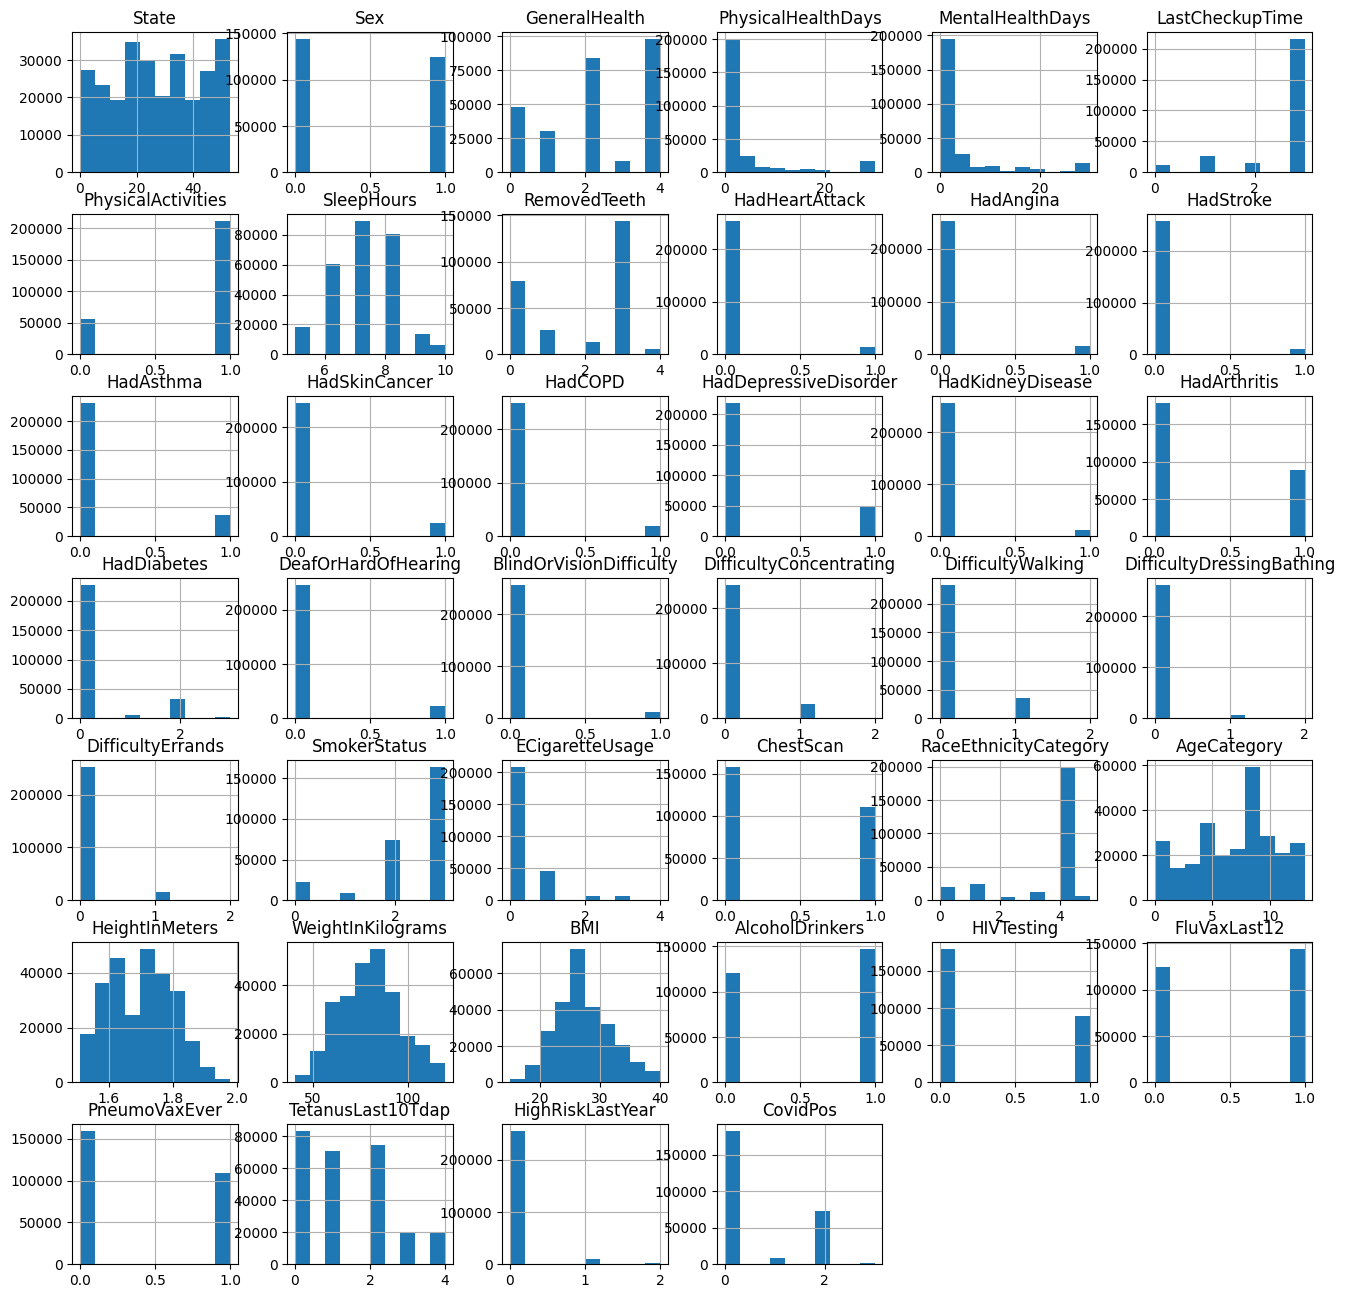

In [206]:
df.hist(figsize = (16, 16))
plt.show()

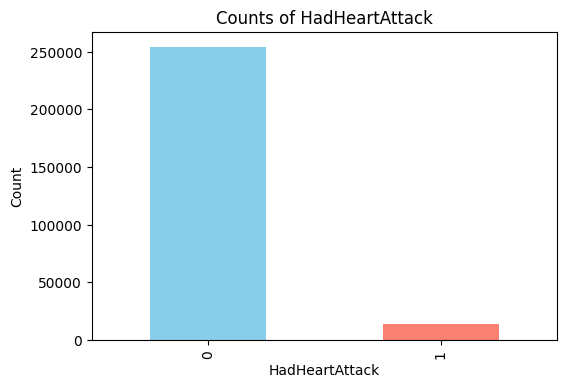

In [14]:
plt.figure(figsize = (6, 4))
df['HadHeartAttack'].value_counts().plot(kind = 'bar', color = ['skyblue', 'salmon'])
plt.title('Counts of HadHeartAttack')
plt.xlabel('HadHeartAttack')
plt.ylabel('Count')
plt.show()

In [208]:
df['HadHeartAttack'].value_counts()

0    254472
1     13729
Name: HadHeartAttack, dtype: int64

In [36]:
from sklearn.utils import resample

df_not_upsemple = df.copy()

df_majority = df[(df['HadHeartAttack'] == 0)]
df_minority = df[(df['HadHeartAttack'] == 1)]

df_minority_upsampled = resample(df_minority, replace = True, n_samples = 254472)

df = pd.concat([df_minority_upsampled, df_majority])

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508944 entries, 117644 to 445128
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      508944 non-null  int64  
 1   Sex                        508944 non-null  int64  
 2   GeneralHealth              508944 non-null  int64  
 3   PhysicalHealthDays         508944 non-null  float64
 4   MentalHealthDays           508944 non-null  float64
 5   LastCheckupTime            508944 non-null  int64  
 6   PhysicalActivities         508944 non-null  int64  
 7   SleepHours                 508944 non-null  float64
 8   RemovedTeeth               508944 non-null  int64  
 9   HadHeartAttack             508944 non-null  int64  
 10  HadAngina                  508944 non-null  int64  
 11  HadStroke                  508944 non-null  int64  
 12  HadAsthma                  508944 non-null  int64  
 13  HadSkinCancer           

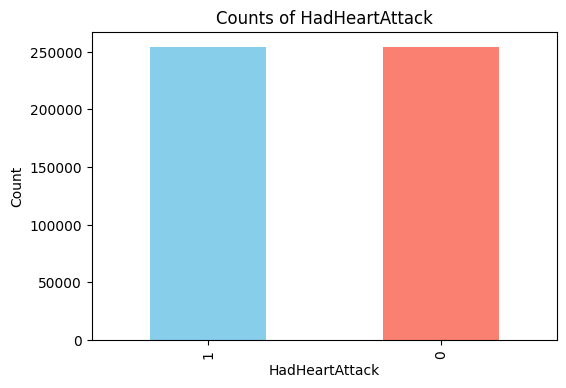

In [14]:
plt.figure(figsize = (6, 4))
df['HadHeartAttack'].value_counts().plot(kind = 'bar', color = ['skyblue', 'salmon'])
plt.title('Counts of HadHeartAttack')
plt.xlabel('HadHeartAttack')
plt.ylabel('Count')
plt.show()

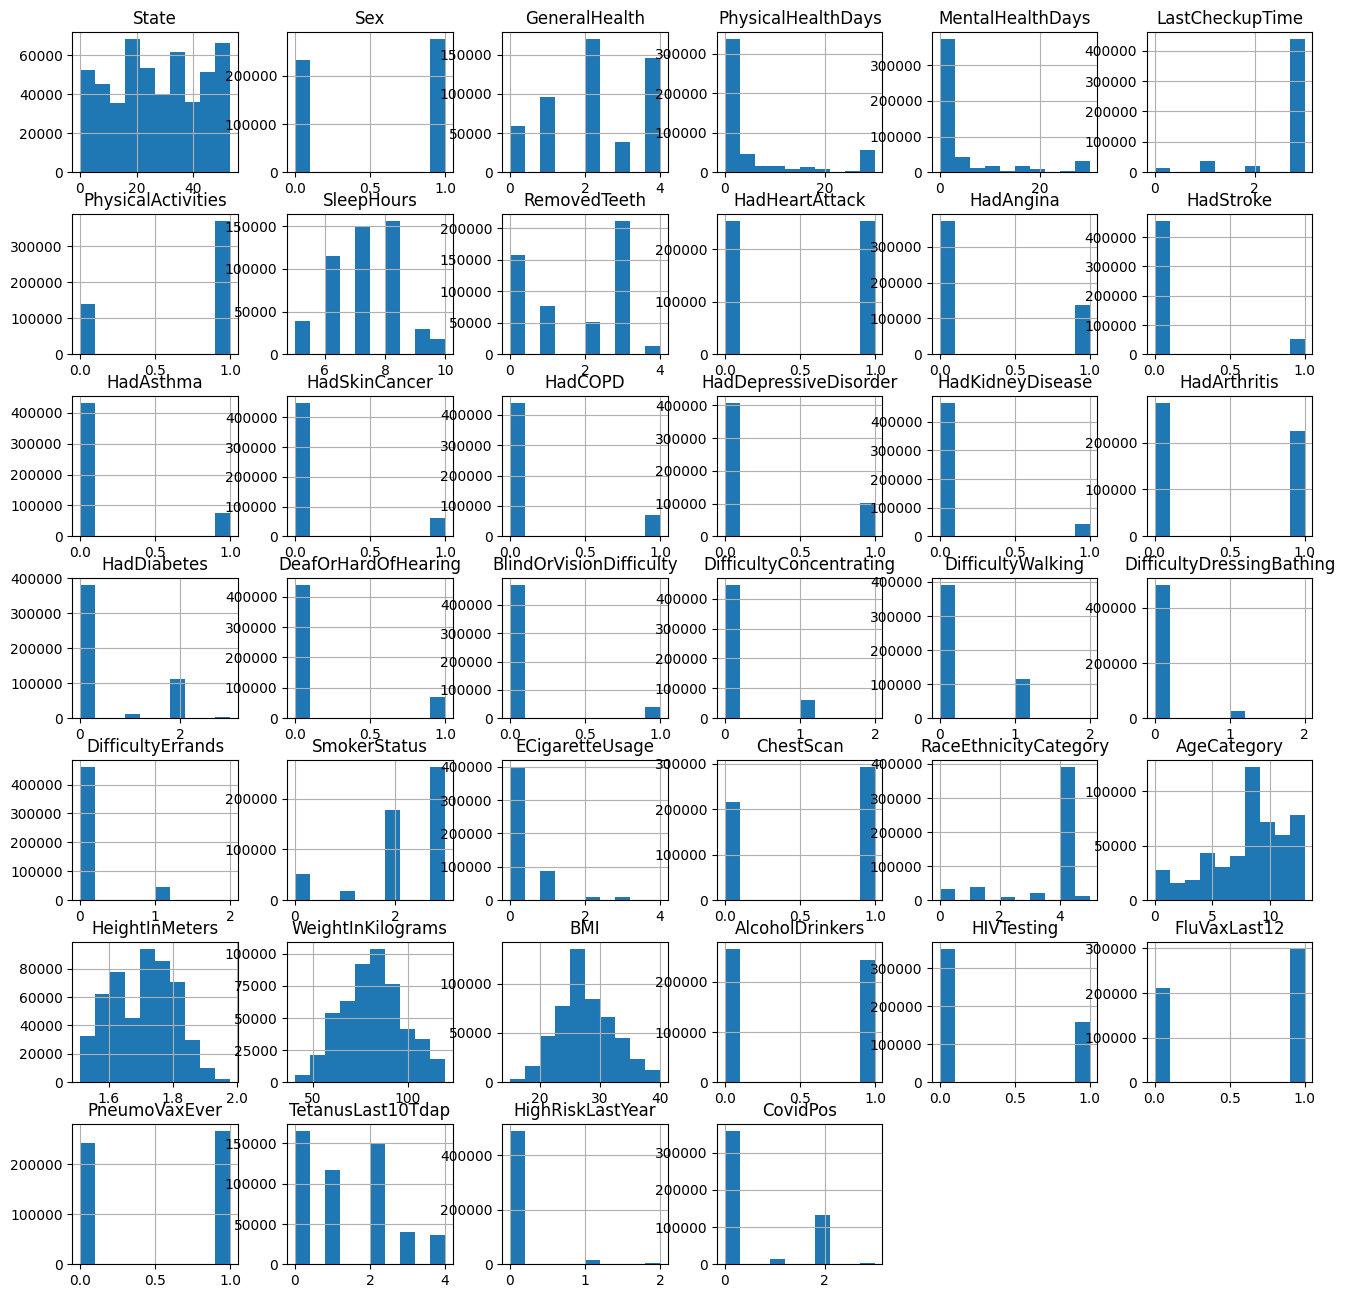

In [212]:
df.hist(figsize = (16, 16))
plt.show()

In [272]:
cor = df.corr()
cor_target = abs(cor["HadHeartAttack"])

relevant_features = cor_target
relevant_features = pd.DataFrame(relevant_features)
relevant_features.sort_values("HadHeartAttack" , ascending = False)

,HadHeartAttack
HadHeartAttack,1.000000
HadAngina,0.529755
AgeCategory,0.408227
ChestScan,0.373565
DifficultyWalking,0.265597
PneumoVaxEver,0.261448
HadDiabetes,0.247169
HadArthritis,0.243192
HadStroke,0.242095
PhysicalHealthDays,0.219754


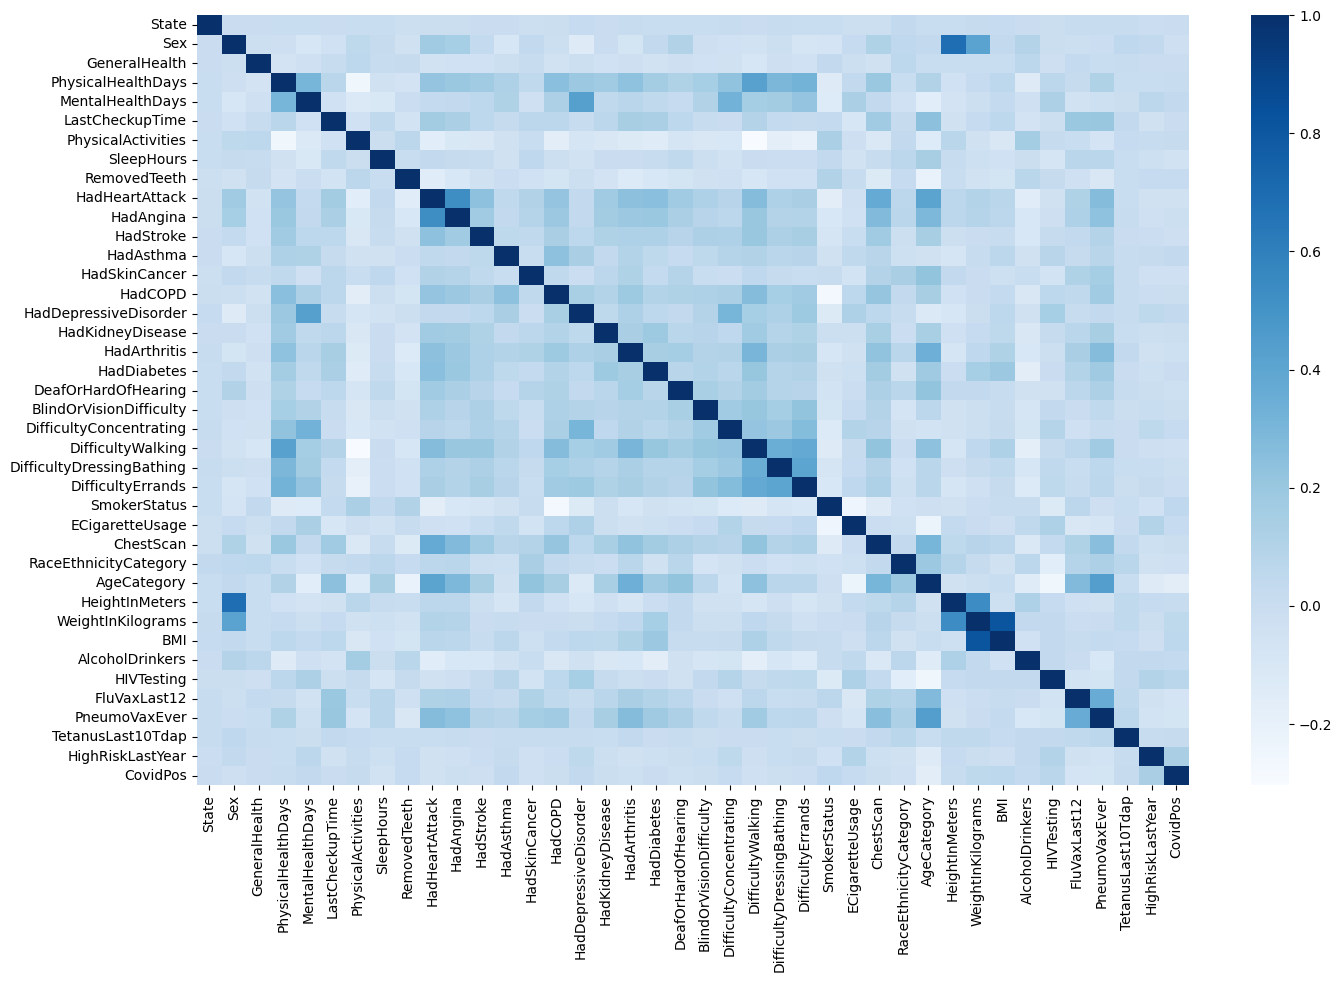

In [17]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), cmap = 'Blues')
plt.show()

In [273]:
cor = df.corr(method = 'spearman')
cor_target = abs(cor["HadHeartAttack"])

relevant_features = cor_target
relevant_features = pd.DataFrame(relevant_features)
relevant_features.sort_values("HadHeartAttack" , ascending = False)

,HadHeartAttack
HadHeartAttack,1.000000
HadAngina,0.529755
AgeCategory,0.390396
ChestScan,0.373565
DifficultyWalking,0.268386
PneumoVaxEver,0.261448
HadDiabetes,0.250497
HadArthritis,0.243192
HadStroke,0.242095
HadCOPD,0.217726


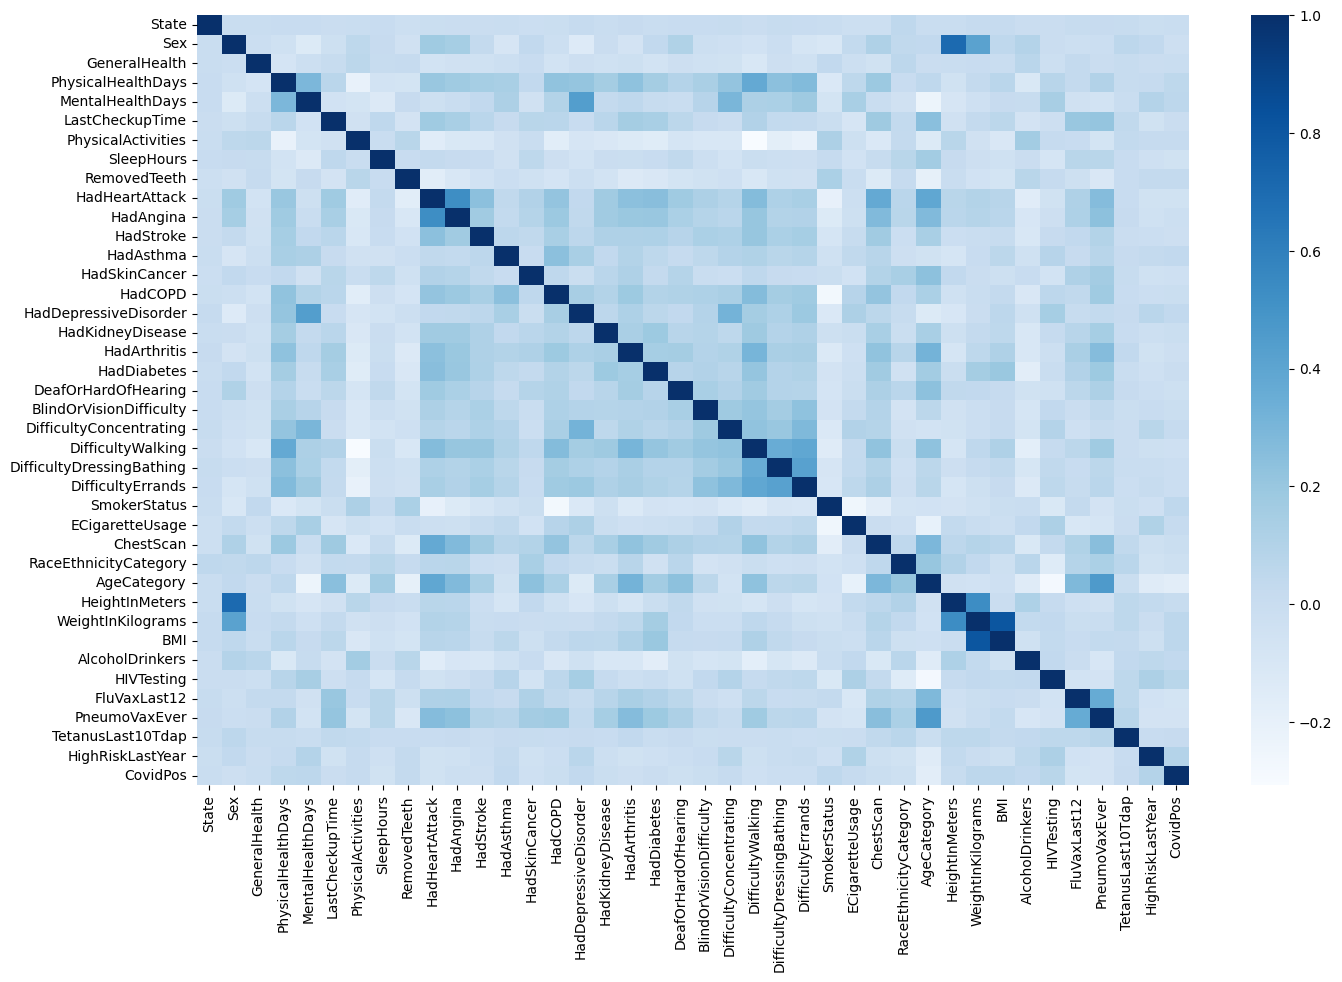

In [18]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(method = 'spearman'), cmap = 'Blues')
plt.show()

In [37]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop('HadHeartAttack', axis = 1)
y = df['HadHeartAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = DecisionTreeClassifier(max_depth = 3)

In [38]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

pred = model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75     50877
           1       0.74      0.81      0.77     50912

    accuracy                           0.76    101789
   macro avg       0.76      0.76      0.76    101789
weighted avg       0.76      0.76      0.76    101789



In [40]:
print(model.feature_importances_)

[0.00000000e+00 6.45811252e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.30018936e-01 4.83720811e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.73555350e-01 0.00000000e+00
 9.52961815e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


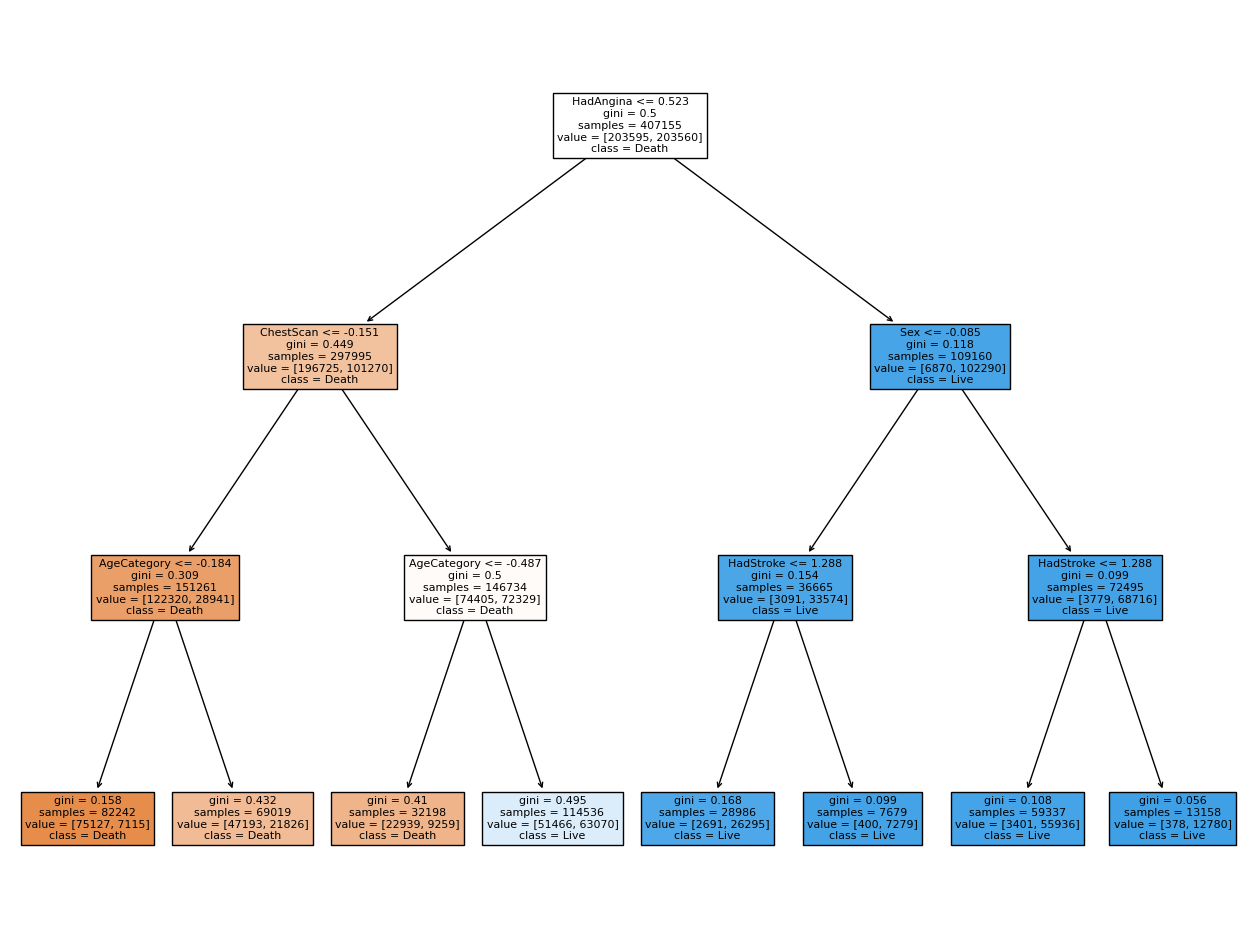

In [41]:
plt.figure(figsize = (16, 12))
plot_tree(model, feature_names = list(df.drop('HadHeartAttack', axis = 1).columns), filled = True, class_names = ['Death', 'Live'])
plt.show()

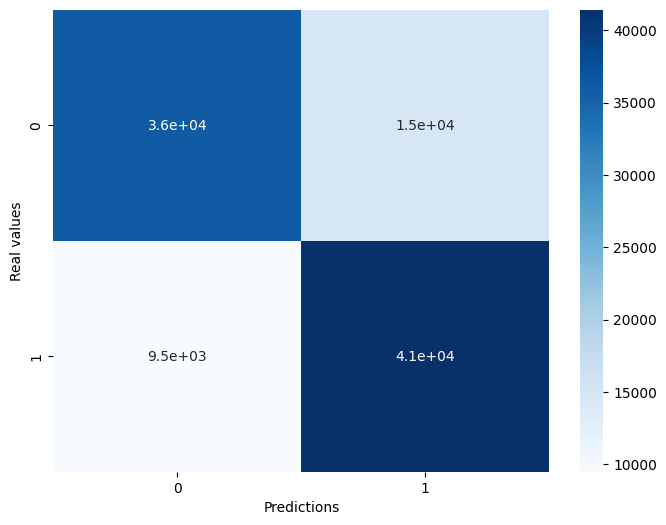

In [42]:
confusion = confusion_matrix(y_test, pred)
plt.figure(figsize = (8, 6))
sns.heatmap(confusion, annot = True, cmap = 'Blues')
plt.xlabel('Predictions')
plt.ylabel('Real values')
plt.show()

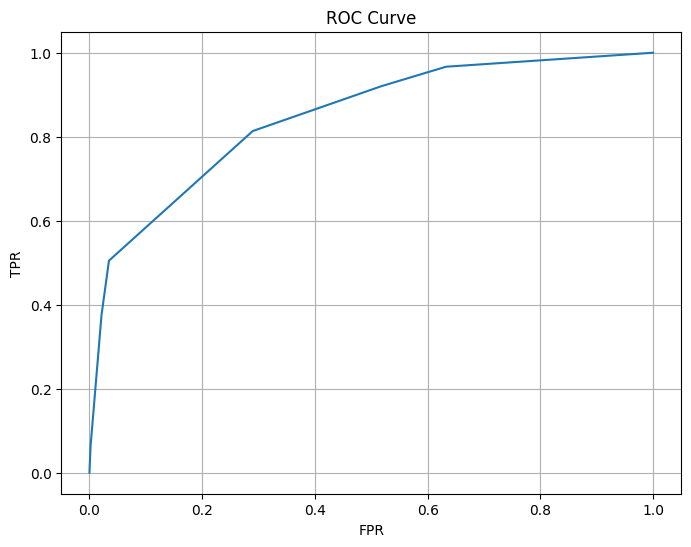

AUC-ROC Score: 0.8456272098563417


In [43]:
predictions_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)

plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, label = 'ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.grid(True)
plt.show()

auc_roc = roc_auc_score(y_test, predictions_proba)
print('AUC-ROC Score:', auc_roc)

In [44]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     50877
           1       0.95      1.00      0.98     50912

    accuracy                           0.97    101789
   macro avg       0.98      0.97      0.97    101789
weighted avg       0.98      0.97      0.97    101789



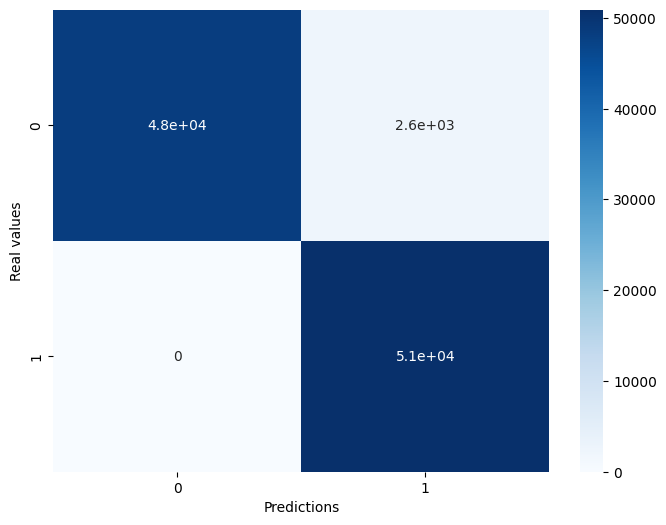

In [45]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

pred = model.predict(X_test)
print(classification_report(y_test, pred))

confusion = confusion_matrix(y_test, pred)
plt.figure(figsize = (8, 6))
sns.heatmap(confusion, annot = True, cmap = 'Blues')
plt.xlabel('Predictions')
plt.ylabel('Real values')
plt.show()

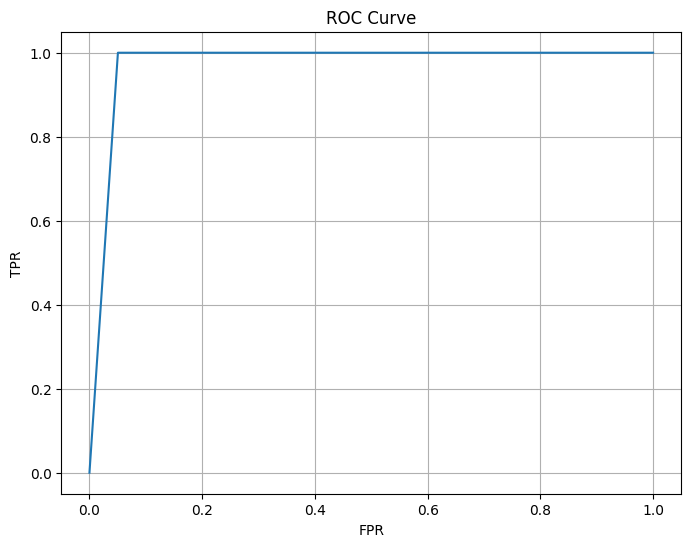

AUC-ROC Score: 0.9747528352693752


In [46]:
predictions_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)

plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, label = 'ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.grid(True)
plt.show()

auc_roc = roc_auc_score(y_test, predictions_proba)
print('AUC-ROC Score:', auc_roc)

In [47]:
print(model.feature_importances_)

[0.31093859 0.0412666  0.02531453 0.02408303 0.02339215 0.02960394
 0.01610136 0.01275367 0.01178754 0.01316188 0.0153146  0.01166094
 0.01625894 0.01638122 0.01857635 0.01776504 0.01441929 0.0178971
 0.01329347 0.01321759 0.01186272 0.01192534 0.01461837 0.01364729
 0.02674276 0.01784655 0.03611418 0.01613905 0.0193507  0.03185954
 0.01424505 0.01642735 0.01487003 0.01168837 0.01460479 0.01211076
 0.0228648  0.01784649 0.01204802]


In [49]:
df_not_upsemple['HadHeartAttack'].value_counts()

0    254472
1     13729
Name: HadHeartAttack, dtype: int64

In [51]:
df_majority = df_not_upsemple[(df_not_upsemple['HadHeartAttack'] == 0)]
df_minority = df_not_upsemple[(df_not_upsemple['HadHeartAttack'] == 1)]

df_majority_downsampled = resample(df_majority, replace = True, n_samples = 13729)

df_not_upsemple = pd.concat([df_majority_downsampled, df_minority])

df_not_upsemple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27458 entries, 302935 to 445130
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      27458 non-null  int64  
 1   Sex                        27458 non-null  int64  
 2   GeneralHealth              27458 non-null  int64  
 3   PhysicalHealthDays         27458 non-null  float64
 4   MentalHealthDays           27458 non-null  float64
 5   LastCheckupTime            27458 non-null  int64  
 6   PhysicalActivities         27458 non-null  int64  
 7   SleepHours                 27458 non-null  float64
 8   RemovedTeeth               27458 non-null  int64  
 9   HadHeartAttack             27458 non-null  int64  
 10  HadAngina                  27458 non-null  int64  
 11  HadStroke                  27458 non-null  int64  
 12  HadAsthma                  27458 non-null  int64  
 13  HadSkinCancer              27458 non-nul

In [52]:
cor = df_not_upsemple.corr()
cor_target = abs(cor["HadHeartAttack"])

relevant_features = cor_target
relevant_features = pd.DataFrame(relevant_features)
relevant_features.sort_values("HadHeartAttack" , ascending = False)

,HadHeartAttack
HadHeartAttack,1.000000
HadAngina,0.528022
AgeCategory,0.409194
ChestScan,0.371472
DifficultyWalking,0.267215
PneumoVaxEver,0.259267
HadDiabetes,0.252778
HadArthritis,0.247934
HadStroke,0.241848
HadCOPD,0.213353


In [59]:
X = df_not_upsemple.drop('HadHeartAttack', axis = 1)
y = df_not_upsemple['HadHeartAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

              precision    recall  f1-score   support

           0       0.76      0.87      0.81      2814
           1       0.84      0.71      0.77      2678

    accuracy                           0.79      5492
   macro avg       0.80      0.79      0.79      5492
weighted avg       0.80      0.79      0.79      5492



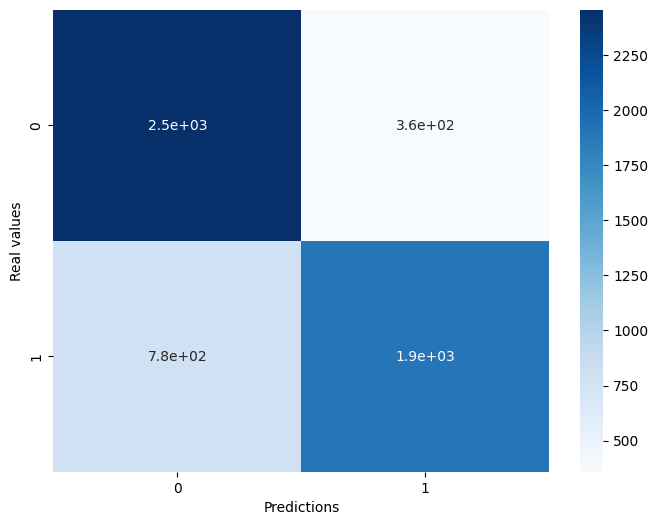

In [60]:
from sklearn.svm import SVC

model = SVC(kernel = 'linear', probability = True)

model.fit(X_train, y_train)

pred = model.predict(X_test)

print(classification_report(y_test, pred))

confusion = confusion_matrix(y_test, pred)

plt.figure(figsize = (8, 6))
sns.heatmap(confusion, annot = True, cmap = 'Blues')
plt.xlabel('Predictions')
plt.ylabel('Real values')
plt.show()

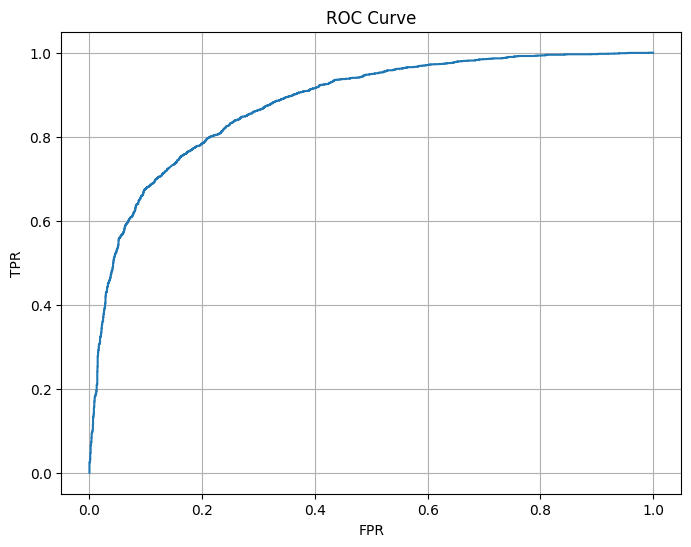

AUC-ROC Score: 0.8788225070104508


In [61]:
predictions_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)

plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, label = 'ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.grid(True)
plt.show()

auc_roc = roc_auc_score(y_test, predictions_proba)
print('AUC-ROC Score:', auc_roc)

              precision    recall  f1-score   support

           0       0.79      0.76      0.77      2814
           1       0.76      0.78      0.77      2678

    accuracy                           0.77      5492
   macro avg       0.77      0.77      0.77      5492
weighted avg       0.77      0.77      0.77      5492



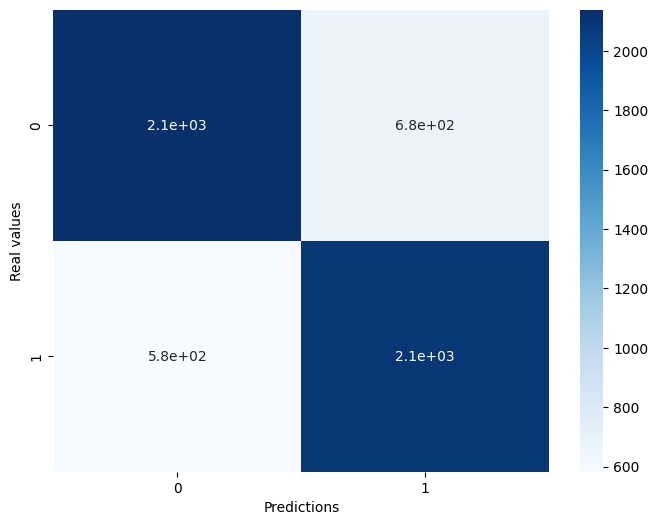

In [62]:
X_train = X_train[:, : 10]
X_test = X_test[:, : 10]

model = SVC(kernel = 'linear', probability = True)

model.fit(X_train, y_train)

pred = model.predict(X_test)

print(classification_report(y_test, pred))

confusion = confusion_matrix(y_test, pred)

plt.figure(figsize = (8, 6))
sns.heatmap(confusion, annot = True, cmap = 'Blues')
plt.xlabel('Predictions')
plt.ylabel('Real values')
plt.show()

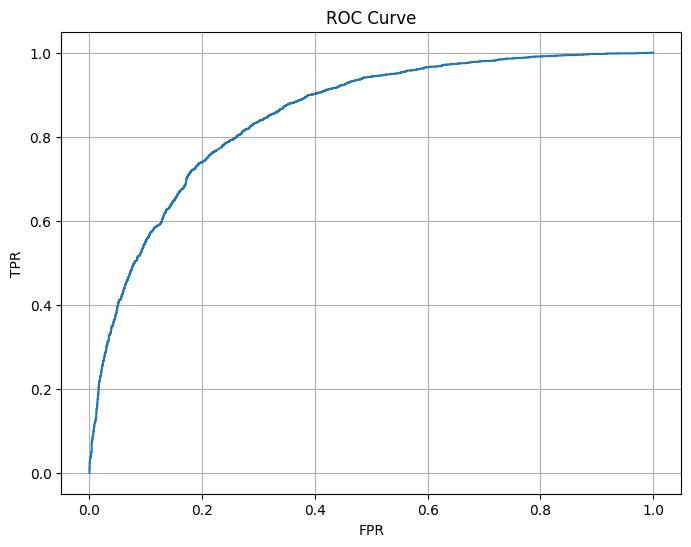

AUC-ROC Score: 0.8501017530506011


In [63]:
predictions_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)

plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, label = 'ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.grid(True)
plt.show()

auc_roc = roc_auc_score(y_test, predictions_proba)
print('AUC-ROC Score:', auc_roc)